# Data Analysis of Jeopardy Questions

 The goal of this project is to examine trends in Jeopardy questions using the '200,000+ Jeopardy! Questions' data set (source: https://www.kaggle.com/tunguz/200000-jeopardy-questions).  First I clean the data by correcting the column names, removing rows with missing values, and removing rows where with audio/video clues. Following that, I examine most used categories by round over the years the data spans.

In [1]:
#start by importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.options.display.width=None

In [2]:
# read data file 
df=pd.read_csv('JEOPARDY_CSV.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216930 entries, 0 to 216929
Data columns (total 7 columns):
Show Number    216930 non-null int64
 Air Date      216930 non-null object
 Round         216930 non-null object
 Category      216930 non-null object
 Value         216930 non-null object
 Question      216930 non-null object
 Answer        216928 non-null object
dtypes: int64(1), object(6)
memory usage: 11.6+ MB


## data cleaning

In [3]:
# remove extra space from column names
df.columns = [x.strip() for x in df.columns]
# remove dollar sign and commas from value column, convert none values to NaN, change all to integers
df['Value'] = df['Value'].str.replace("$", '')
df['Value'] = df['Value'].str.replace(",", '')
df['Value'] = df['Value'].replace("None",np.nan).fillna(0).astype(int)

The show number does not provide any useful information so I drop that column.

In [4]:
#drop show number
df.drop('Show Number', inplace=True, axis=1)

Next I check for any rows containing null values.  As there are only two such rows out of the 216,928 rows I simply drop them.  I also check  for any irregularities in the questions column and drop any rows where the question is listed as an audio or video clue or as filler, as they again make up a miniscule portion of the data.  This will leave only rows that contain both questions and their answers.

In [5]:
# check for any rows with null values and drop them if number is small
df.isnull().sum()

Air Date    0
Round       0
Category    0
Value       0
Question    0
Answer      2
dtype: int64

In [6]:
#find the indices of the rows will null values
df[df['Answer'].isnull()]

,Air Date,Round,Category,Value,Question,Answer
94817,2003-06-23,Jeopardy!,"GOING ""N""SANE",200,"It often precedes ""and void""",NaN
143297,2011-06-21,Double Jeopardy!,NOTHING,400,"This word for ""nothing"" precedes ""and void"" to...",NaN


In [7]:
df.drop(df.index[[94817, 143297]], inplace=True)

In [8]:
#check question column for rows with abnormal clue type ie video clues and remove
df['Question'].value_counts().head(10)

[audio clue]                       17
[video clue]                       14
(audio clue)                        5
[filler]                            5
Greenland                           4
Hainan                              4
Abigail Smith                       4
"A watched pot never" does this     3
Howard                              3
1861-1865                           3
Name: Question, dtype: int64

In [9]:
aud1=df[df['Question']=='[audio clue]']
aud2=df[df['Question']=='(audio clue)']
vid=df[df['Question']=='[video clue]']
filler=df[df['Question']=='[filler]']

df.drop(aud1.index, inplace=True)
df.drop(aud2.index, inplace=True)
df.drop(vid.index, inplace=True)
df.drop(filler.index, inplace=True)

Finally I convert the date column to timeStamps and extract the year to its own column for convenience.

In [10]:
df['Air Date']=pd.to_datetime(df['Air Date'], format='%Y-%m-%d')

In [11]:

def get_year (date_val):
    return (date_val).year
df['Year']=df['Air Date'].apply(get_year)

## Plots

Now that the data is organized, I will examine the popularity of different categories.  The first chart shows the 10 categories with the most questions from all years in the dataset for each of the possible rounds.  For these years the choice of Jeopardy! questions.  This shows that Before & After was the most used category both overall and in the Double Jeopardy! round. 

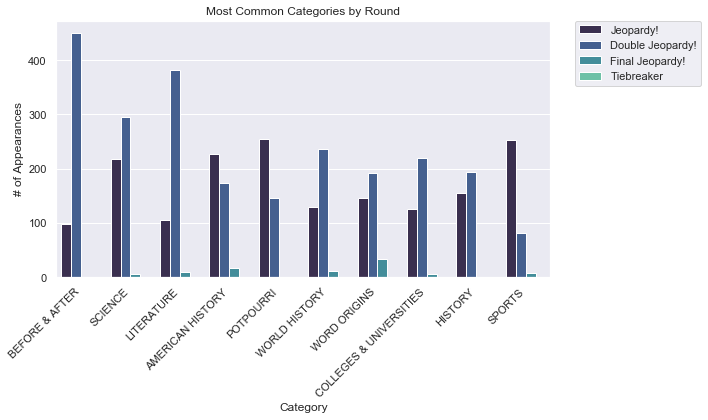

In [12]:
# plot top 10 most common categories for each round
sns.set(rc={'figure.figsize':(10,6)})
ax=sns.countplot(x='Category', data=df, hue='Round',order=df['Category'].value_counts().head(10).index, palette='mako')
ax.set_title('Most Common Categories by Round')
ax.set_xlabel('Category')
ax.set_ylabel('# of Appearances')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()

We now explore the categories with the most appearances in each of the two main rounds.  In the Jeopardy! round we see a three-way tie between 'Stupid Answers', 'Potpourri', and 'Sports.'  The gap between the three most used and the 10th is 70 questions. 

In [13]:
# create separate dataframes for first and second rounds in ordre to plot top 10 categories for each round
df_r1=df[df['Round']=='Jeopardy!']
df_r2=df[df['Round']=='Double Jeopardy!']

In [14]:
df_r1['Category'].value_counts().head(10)

POTPOURRI              255
STUPID ANSWERS         255
SPORTS                 253
ANIMALS                233
AMERICAN HISTORY       227
SCIENCE                217
STATE CAPITALS         210
TELEVISION             200
U.S. CITIES            195
BUSINESS & INDUSTRY    185
Name: Category, dtype: int64

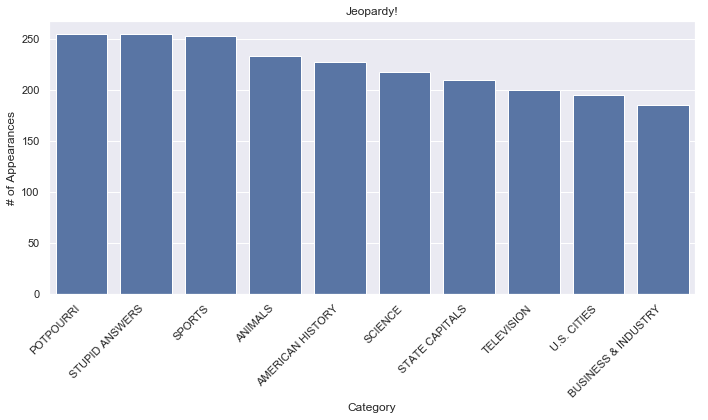

In [15]:
#plot counts for 10 most used round 1 categories
ax=sns.countplot(x='Category', data=df_r1, order=df_r1['Category'].value_counts().head(10).index, color='b')
ax.set_title('Jeopardy!')
ax.set_xlabel('Category')
ax.set_ylabel('# of Appearances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [16]:
#separate dataframes for popular categories for convenience
df_stupid=df[df['Category']=='STUPID ANSWERS']
df_bf=df[df['Category']=='BEFORE & AFTER']
df_po=df[df['Category']=='POTPOURRI']
df_sp=df[df['Category']=='SPORTS']

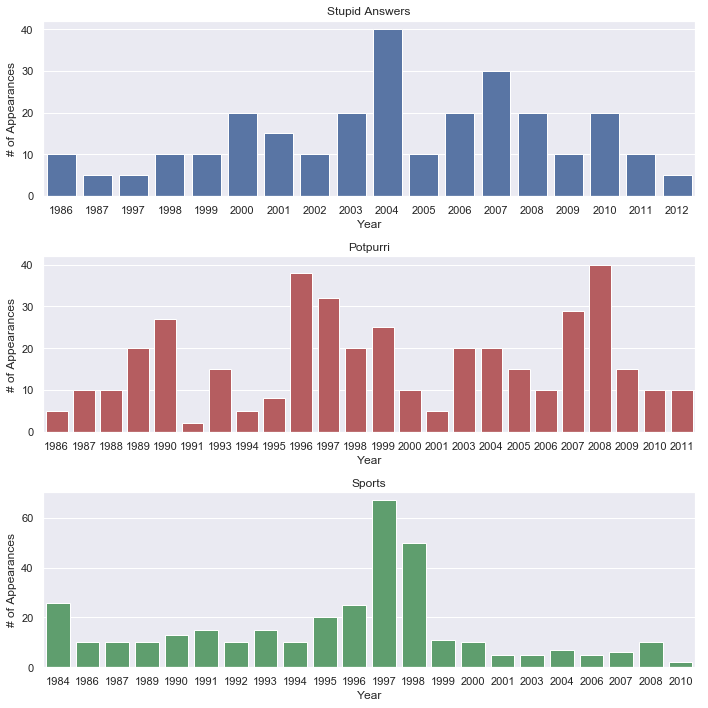

In [17]:
#plot the three top round 1 categories by year
sns.set(rc={'figure.figsize':(10,10)})

fig, ax=plt.subplots(3,1)


ax1=sns.countplot(df_stupid['Year'], ax=ax[0], color='b')
ax2=sns.countplot(df_po['Year'], ax=ax[1], color='r')
ax3=sns.countplot(df_sp['Year'], ax=ax[2], color='g')


#for i in range(ax.shape[0]):
 #   ax[i].xaxis.set_major_locator(plt.MaxNLocator(12))

ax1.set_ylabel('# of Appearances')
ax2.set_ylabel('# of Appearances')
ax3.set_ylabel('# of Appearances')
ax1.set_title('Stupid Answers')
ax2.set_title('Potpurri')
ax3.set_title('Sports') 

plt.tight_layout();


From these figures we see that the 'Sports' category had the two highest yearly counts out of all three categories.  These occured in 1997 and 1998 but otherwise was the least used of the three.  This could be a greater interest in sports in those years.  There were, for example, several sports scandals in 1997 (Mike Tyson, Dennis Rodman).  'Potpourri' had the most consistent number of questions throughout the time period.  It would seem that contestants should always be prepared for questions from this category.

Next, I plot the 10 most used categories for the time period in the Double Jeopardy! round.  Here there is a difference of 200 questions between the most used, 'Before & After,' and the tenth most used.  At first glance this would led one to believe that 'Before & After' is the most likely category to be encountered in a game of Jeopardy.  However, let's look at how its popularity has changed over the time period.

In [18]:
#check round 2 category counts
df_r2['Category'].value_counts().head()

BEFORE & AFTER     450
LITERATURE         381
SCIENCE            296
WORLD GEOGRAPHY    254
OPERA              250
Name: Category, dtype: int64

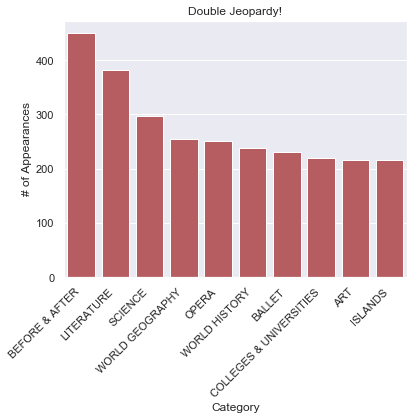

In [19]:
#plot round 2 top 10 category counts
sns.set(rc={'figure.figsize':(6,6)})
ax=sns.countplot(x='Category', data=df_r2, order=df_r2['Category'].value_counts().head(10).index, color='r')
ax.set_title('Double Jeopardy!')
ax.set_xlabel('Category')
ax.set_ylabel('# of Appearances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

Plotting the number of 'Before & After' questions by year shows a peak in 1999 but a consistent decline in usage from then until the end of the data collection period.  While still a common category it would not have ass much relevance in 2011 as it did in the few years surrounding 1999.s

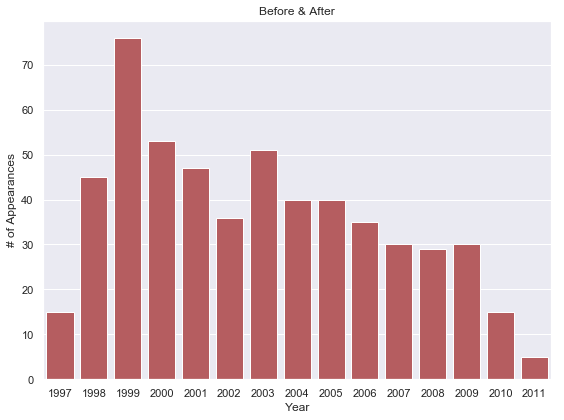

In [20]:
#plot before&after # of questions per year
sns.set(rc={'figure.figsize':(8,6)})
ax=sns.countplot(df_bf['Year'], color='r')
ax.set_ylabel('# of Appearances')
ax.set_title('Before & After')
plt.tight_layout()